In [1]:
import cv2
import mediapipe as mp
import numpy as np
import time
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [2]:
# VIDEO FEED
cap = cv2.VideoCapture('KneeBendVideo.mp4')
while True:
    ret, frame = cap.read()
    if(ret==True):
        cv2.imshow('Knee bend video', frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()

In [3]:
cap = cv2.VideoCapture('KneeBendVideo.mp4')
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while True:
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Knee bend video', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [4]:
cap = cv2.VideoCapture('KneeBendVideo.mp4')
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while True:
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Knee bend video', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [5]:
len(landmarks)
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)
landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].visibility
landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value]
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


x: 0.4922060966491699
y: 0.777087926864624
z: -0.18945243954658508
visibility: 0.6733637452125549

In [6]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [7]:
hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

In [8]:
hip, knee, ankle
calculate_angle(hip, knee, ankle)
tuple(np.multiply(knee, [640, 480]).astype(int))

(327, 418)

In [9]:
cap = cv2.VideoCapture('KneeBendVideo.mp4')
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while True:
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            # Calculate angle
            angle = calculate_angle(hip, knee, ankle)
            
            # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(knee, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
                       
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Knee bend video', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [10]:
cap = cv2.VideoCapture('KneeBendVideo.mp4')

# Curl counter variables
counter = 0 
stage = "down"
feedback=None
temp_angle=180
angle_array=[]
min_angle=180
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while True:
        ret, frame = cap.read()
        if(ret==True):
            # Recolor image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            # Make detection
            results = pose.process(image)

            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark

                # Get coordinates
                hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
                knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
                ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

                # Calculate angle
                angle = calculate_angle(hip, knee, ankle)

                # Visualize angle
                cv2.putText(image, str(angle), 
                               tuple(np.multiply(knee, [640, 480]).astype(int)), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
                
                if(angle<min_angle):
                        min_angle=angle
                # fluctuation logic   
                if((temp_angle-angle)>40):
                    angle=temp_angle
                else:
                    temp_angle=angle

                # Curl counter logic
                if temp_angle < 140 and stage =='down':
                    itime=time.time()
                    stage="up"
                    feedback=None
                    if(temp_angle<min_angle):
                        min_angle=temp_angle
                if temp_angle > 140 and stage =="up":
                    stage='down'
                    etime=time.time()
                    if((etime-itime)>8):
                        counter +=1
                        print(counter)
                        feedback=None
                        angle_array.append(min_angle)
                    else:
                        feedback=("Keep your knee bent")
                    min_angle=180


            except:
                pass

            # Render curl counter
            # Setup status box
            cv2.rectangle(image, (0,0), (425,73), (245,117,16), -1)

            # Rep data
            cv2.putText(image, 'REPS', (15,12), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, str(counter), 
                        (10,50), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

            # Stage data
            cv2.putText(image, 'FEEDBACK', (200,12), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, stage, (350,12), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image, feedback, 
                        (90,50), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)


            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                     )               
            
            cv2.imshow('Knee bend video', image)
            
            if cv2.waitKey(2) & 0xFF == ord('q'):
                break
        else:
            break
    cap.release()
    cv2.destroyAllWindows()

1
2
3
4
5
6
7
8
9
10
11


[45.99130528760539, 85.69576770835575, 88.36265297132825, 102.56985377400241, 51.84193376476486, 103.36093068323922, 110.22211810191595, 52.62653057117162, 21.38630512671021, 0.06628163119219335, 1.070986574433101]


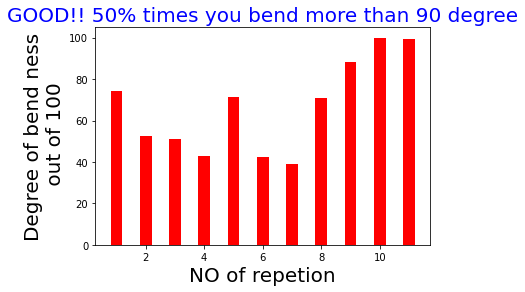

In [11]:
import matplotlib.pyplot as plt
print (angle_array)
angle_array=((180-np.array(angle_array))/180)*100
feedback_array=(angle_array <80)
feedback=(np.sum(feedback_array)/counter)*100
if(feedback>50):
    title=("GOOD!! 50% times you bend more than 90 degree")
else:
    title=("NOT GOOD!! less than 50% times you bend more than 90 degree")
rep=[]
for i in range(1,counter+1):
    rep.append(i)
plt.bar(rep,(angle_array),color='red',width=0.4)
plt.title(title,fontsize=20,color='b')
plt.xlabel("NO of repetion",fontsize=20)
plt.ylabel("Degree of bend ness\n out of 100",fontsize=20)
plt.show()

### HIGHER THE HIEGHT MORE THE DEGREE OF BEND NESS